<a href="https://colab.research.google.com/github/PedroMatumoto/AI_Notebooks/blob/main/case_co2_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade: Prevendo a Qualidade de Vinhos a partir de Propriedades Químicas

In [85]:
# @title Nome - 1º Integrante:
Nome1 = "Pedro Henrique de Sousa Matumoto" # @param {type:"string"}
Numero = "21.00784-5" # @param {type:"string"}

In [86]:
# @title Nome - 2º Integrante:
Nome1 = "Aline Nunes Watanabe" # @param {type:"string"}
Numero = "21.00309-2" # @param {type:"string"}

## Contextualização: IA para Saúde e Meio Ambiente

As emissões de dióxido de carbono (CO₂) dos veículos são um dos principais contribuintes para a poluição atmosférica. A exposição prolongada a poluentes como CO₂, óxidos de nitrogênio (NOx) e material particulado está associada a diversos problemas de saúde pública, incluindo:

- Aumento de doenças respiratórias, como asma e bronquite;
- Agravamento de condições cardiovasculares;
- Redução da expectativa de vida em áreas urbanas.

De acordo com a Organização Mundial da Saúde (OMS), cerca de 7 milhões de mortes por ano estão associadas à poluição do ar. Dessa forma, prever e controlar as emissões de veículos é essencial não só para o meio ambiente, mas também para a **qualidade de vida e saúde da população**.

Nesta atividade, você utilizará técnicas de **inteligência artificial aplicada à saúde e sustentabilidade** para estimar as emissões de CO₂ de veículos, com base em características técnicas como o tipo de combustível, consumo urbano e rodoviário, tipo de transmissão, entre outros.

Seu modelo poderá, futuramente, ser usado por agências de regulação ambiental ou por governos para **identificar veículos mais poluentes**, **avaliar políticas públicas** e **reduzir impactos negativos na saúde coletiva**.

---

Mais do que apenas treinar um modelo, esta atividade convida você a entender o comportamento das variáveis, tomar decisões de pré-processamento, construir modelos e refletir sobre os resultados obtidos.

**Objetivo**

Produzir um **relatório técnico** documentando todas as etapas do processo de análise, incluindo exploração de dados, tratamento de variáveis, modelagem e avaliação.

**Tarefa de Machine Learning**

Prever a variável contínua `CO2 Emissions(g/km)`, a partir das variáveis de entrada.

---

## Link do dataset

[CO2 Emission by Vehicles - Kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles)

---

## Etapas da Análise

### 1. Carregue os dados e observe as primeiras linhas
- Quais variáveis o dataset contém e o que elas significam?
- Quais são os tipos de variáveis?
- Existem valores faltantes ou suspeitos?
- Crie um gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível.

### 2. Tipo de Tarefa
- Qual tipo de tarefa de aprendizado de máquina esse problema representa?

### 3. Pré-processamento
- Como tratar variáveis como `Fuel Type` ou `Transmission`?
- Há variáveis altamente correlacionadas? Você usaria todas?

### 4. Divisão dos Dados
- Divida o conjunto em treino e teste (por exemplo, 80%/20%).

### 5. Treinamento de Modelos
Treine ao menos dois modelos para estimar as emissões de CO₂:
- Exemplos: regressão linear, k-vizinhos próximos, árvore de decisão, floresta aleatória.

### 6. Avaliação de Desempenho
- Quais métricas são mais adequadas para esse tipo de tarefa?  
- O modelo parece estar superajustado ou subajustado?

### 7. Interpretação dos Resultados
- Quais variáveis mais influenciam na emissão de CO₂?
- Que melhorias ou ajustes poderiam ser feitos?

---

## Desafio Extra

Crie um gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível. O que você observa?  
- A relação é linear?  
- Consegue pensar em uma relação que se adapte melhor a esses dados?

---


# Tipo da tarefa
É uma tarefa de regressão.

# Lendo e analisando os dados

In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [108]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Analises

In [89]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [90]:
df.dtypes

,0
Make,object
Model,object
Vehicle Class,object
Engine Size(L),float64
Cylinders,int64
Transmission,object
Fuel Type,object
Fuel Consumption City (L/100 km),float64
Fuel Consumption Hwy (L/100 km),float64
Fuel Consumption Comb (L/100 km),float64


In [91]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Verificar nulos

In [92]:
# ver nulos
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


### Gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

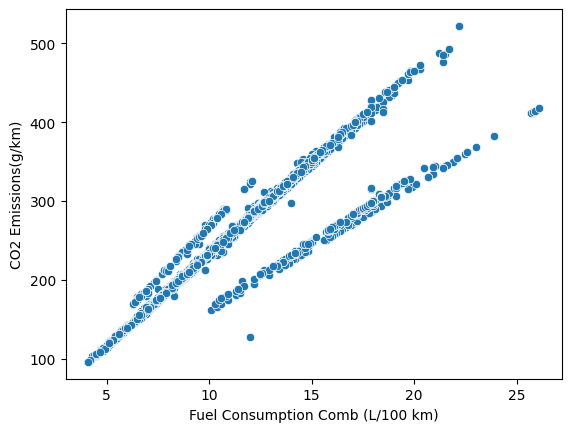

In [93]:
sns.scatterplot(x="Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)", data=df)

## Analise das variáveis

In [94]:
qualitativas = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for i in qualitativas:
    # printando todos os valores possiveis
    print(i)
    print(df[i].unique())
    print(len(df[i].unique()))

Make
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
42
Model
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
2053
Vehicle Class
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
16
Transmission
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'A

### Verificando distruicao qualitativas


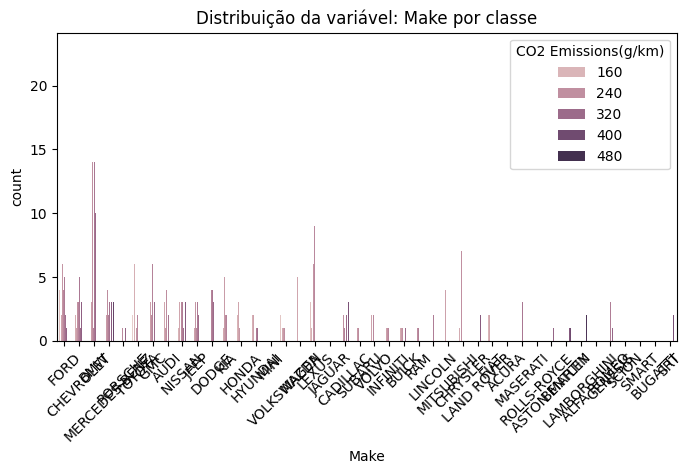

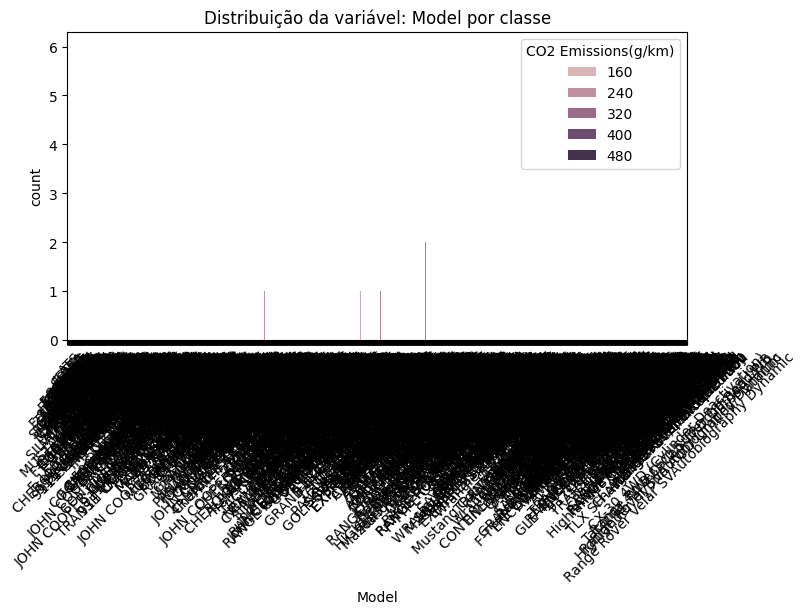

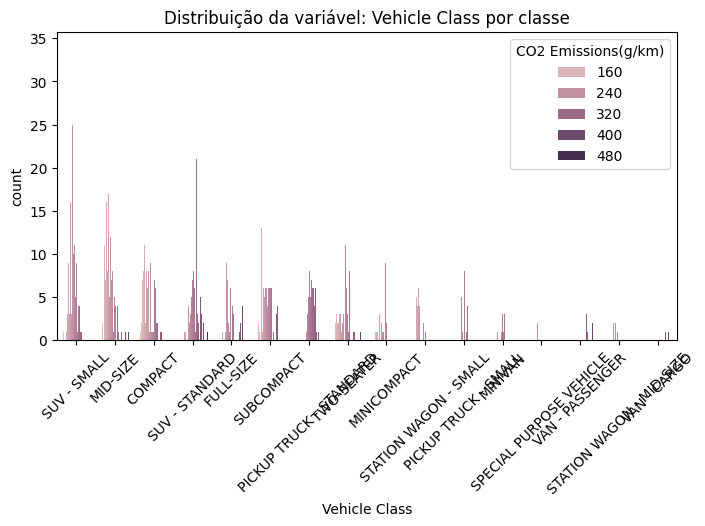

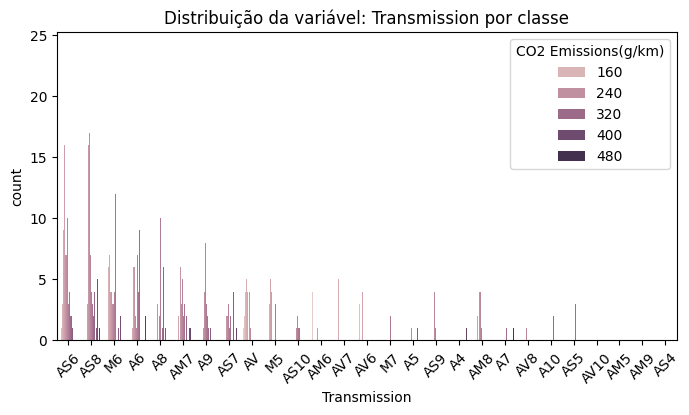

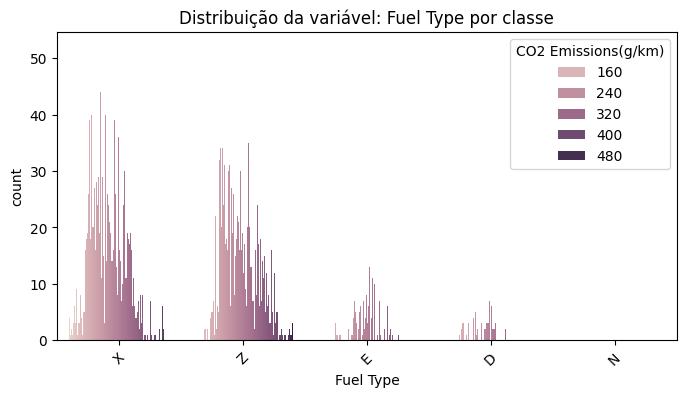

In [95]:
qualitativas = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
for coluna in qualitativas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=coluna, hue='CO2 Emissions(g/km)', order=df[coluna].value_counts().index)
    plt.title(f'Distribuição da variável: {coluna} por classe')
    plt.xticks(rotation=45)
    plt.show()

### Verificando relevância das variáveis

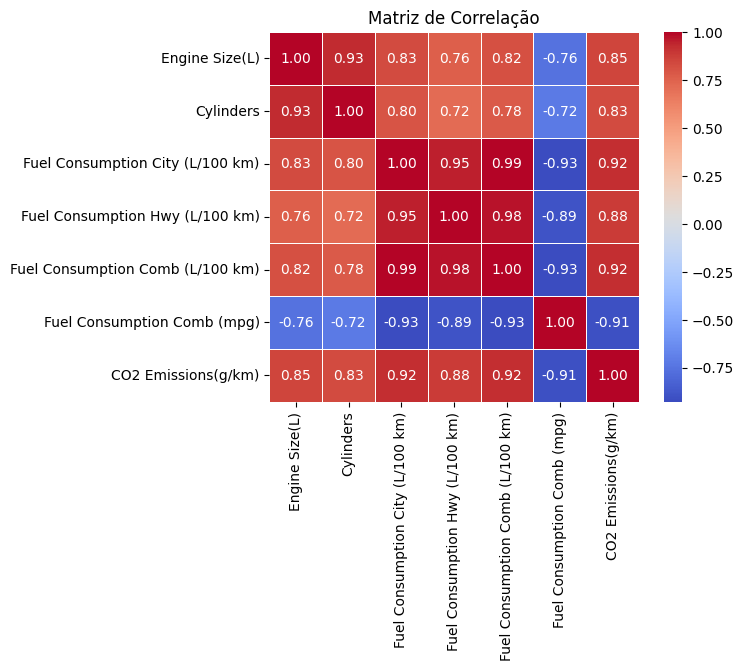

In [96]:
# Seleciona apenas colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlacao = df_numerico.corr()

# Exibe o heatmap
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Tratamento

## Limpando variáveis irrelevantes


Eliminaremos Fuel Consumption Comb (L/100 km) por ter baixa relação com as demais variáveis e Model por ser muito extenso


In [109]:
df = df.drop(['Model','Fuel Consumption Comb (mpg)'], axis=1)

## Colocando em dummies

In [110]:
df = pd.get_dummies(df, drop_first=True)
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,Make_BENTLEY,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,196,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.4,4,11.2,7.7,9.6,221,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1.5,4,6.0,5.8,5.9,136,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3.5,6,12.7,9.1,11.1,255,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.1,8.7,10.6,244,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,219,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7381,2.0,4,11.2,8.3,9.9,232,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7382,2.0,4,11.7,8.6,10.3,240,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7383,2.0,4,11.2,8.3,9.9,232,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Escalonamento e balanceamento

In [111]:
y = df['CO2 Emissions(g/km)']

# Elimina a coluna de saída
X = df.drop(columns=['CO2 Emissions(g/km)'])

print(X.shape)

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

# Print dataset normalizado
print('Tamanho do dataset:', X.shape)
print(X)

(7385, 91)
Tamanho do dataset: (7385, 91)
[[-0.85672099 -0.88340757 -0.75900153 ... -0.01163735 -0.98508081
   1.14296589]
 [-0.5613172  -0.88340757 -0.3875769  ... -0.01163735 -0.98508081
   1.14296589]
 [-1.22597573 -0.88340757 -1.87327544 ... -0.01163735 -0.98508081
   1.14296589]
 ...
 [-0.85672099 -0.88340757 -0.24472127 ... -0.01163735 -0.98508081
   1.14296589]
 [-0.85672099 -0.88340757 -0.3875769  ... -0.01163735 -0.98508081
   1.14296589]
 [-0.85672099 -0.88340757 -0.10186564 ... -0.01163735 -0.98508081
   1.14296589]]


## Separando as bases e estratificando

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print('Dataset de treinamento:', X_train.shape)
print('Dataset de teste:', X_test.shape)

Dataset de treinamento: (5908, 91)
Dataset de teste: (1477, 91)


In [101]:
class_metrics = {}

# Treinando os modelos

#### Reglog

In [102]:
# Treinando o classificador Regressão Logística
clf_dt = LogisticRegression()
clf_dt.fit(X_train, y_train)

# Aplicando ao conjunto de teste
dt_pred = clf_dt.predict(X_test)

# Calculando métricas
dt_acc = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

# Armazenando resultados
class_metrics['RegLog'] = [dt_acc, dt_f1]

print(f'Regressão Logística. Acurácia: {dt_acc * 100:.4}, F1-score: {dt_f1 * 100:.4}')



Regressão Logística. Acurácia: 13.88, F1-score: 12.82
MAE: 13.51
MSE: 421.86
RMSE: 20.54
R²: 0.88


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### kNN

In [116]:
# Treinando o classificador k-NN
clf_lr = KNeighborsClassifier(n_neighbors=3)
clf_lr.fit(X_train, y_train)

# Aplicando ao conjunto de teste
lr_pred = clf_lr.predict(X_test)

# Calculando métricas
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

# Armazenando resultados
class_metrics['kNN'] = [lr_acc, lr_f1]

print(f'k-Vizinhos Próximos. Acurácia: {lr_acc * 100:.4}, F1-score: {lr_f1 * 100:.4}')

k-Vizinhos Próximos. Acurácia: 27.42, F1-score: 27.06


#### Arvore de decisão

In [104]:
# Cria o modelo
clf_tree = DecisionTreeClassifier()

# Ajusta os parâmetros
clf_tree.fit(X_train, y_train)

# Aplica ao conjunto teste
tree_pred = clf_tree.predict(X_test)

# Calcula métricas
tree_acc = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred, average='weighted')

# Calcula métricas de avaliação
class_metrics['DecTree'] = [tree_acc, tree_f1]

print(f'Árvore de Decisão. Acurácia: {tree_acc * 100:.4}, F1-score: {tree_f1 * 100:.4}')

Árvore de Decisão. Acurácia: 54.3, F1-score: 54.0


#### Floresta aleatória

In [105]:
# Treinando o classificador Floresta Aleatória
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Aplicando ao conjunto de teste
rf_pred = clf_rf.predict(X_test)

# Calculando métricas
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Armazenando resultados
class_metrics['RandFor'] = [rf_acc, rf_f1]

print(f'Floresta Aleatória. Acurácia: {rf_acc * 100:.4}, F1-score: {rf_f1 * 100:.4}')

Floresta Aleatória. Acurácia: 49.36, F1-score: 48.97


#### Regressão Linear

In [106]:
import statsmodels.api as sm
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

# selecionar features relevantes
df = df.drop(['Model','Fuel Consumption Comb (mpg)'], axis=1)

# dropar as qualitativas
df = pd.get_dummies(df, drop_first=True)

X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption City (L/100 km)']]
y = df['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionar constante para o modelo
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criar e treinar o modelo
model = sm.OLS(y_train, X_train_const).fit()

# Fazer previsões
y_pred = model.predict(X_test_const)

# Exibir sumário da regressão
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                     8628.
Date:                 Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                         15:49:43   Log-Likelihood:                -26165.
No. Observations:                 5908   AIC:                         5.234e+04
Df Residuals:                     5902   BIC:                         5.238e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Métricas
Como é um problema de regressão, as melhores métricas serão
MAE (Erro Absoluto Médio), MSE (Erro Quadrático Médio), RMSE (Raiz do Erro Quadrático Médio), R² (Coeficiente de Determinação), MAPE (% Erro Absoluto Médio)

In [107]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 13.51
MSE: 421.86
RMSE: 20.54
R²: 0.88


# Conclusão
Os modelos não estão conseguindo prever muito bem com os dados fornecidos, portanto ele está subajustado.